In [3]:
import ollama
import utils

In [4]:
def get_img_path(adl, id):
    return f"/media/adeshkadambi/WD_BLACK/PhD/adl_recognition/{adl}/frames/{id}.jpg"

In [5]:
# PROMPTS

prompts = {

# "v1" : """
# You are an occupational therapist. You are watching video footage one frame at a time
# of patients at home after a spinal cord injury performing activities of daily living (ADLs).

# You are trying to determine what ADL or iADL is being performed in this image from this list:

# 1. Feeding: Eating or drinking food.
# 2. Functional Mobility: Moving from one position or place to another (during performance of everyday activities), such as in-bed mobility, wheelchair mobility, and transfers (e.g., wheelchair, bed, car, shower, tub, toilet, chair, floor).
# 3. Grooming / Health Management: Obtaining and using supplies; removing body hair (e.g., using razor, tweezers, lotion); applying and removing cosmetics; washing, drying, combing, styling, brushing, and trimming hair; caring for nails (hands and feet); caring for skin, ears, eyes, and nose; applying deodorant; cleaning mouth; brushing and flossing teeth; and removing, cleaning, and reinserting dental orthotics and prosthetics. Developing, managing, and maintaining routines for health and wellness promotion, such as physical fitness, nutrition, decreased health risk behaviors, and medication routines.
# 4. Communication Management: Sending, receiving, and interpreting information using a variety of systems and equipment, including writing tools, telephones (cell phones or smartphones), keyboards, audiovisual recorders, computers or tablets, communication boards, call lights, emergency systems, Braille writers, telecommunication devices for deaf people, augmentative communication systems, and personal digital assistants.
# 5. Home Establishment and Management: Obtaining and maintaining personal and household possessions and environment (e.g., home, yard, garden, appliances, vehicles), including maintaining and repairing personal possessions (e .g ., clothing, household items) and knowing how to seek help or whom to contact (e.g., cleaning, laundry).
# 6. Meal Preparation and Cleanup: Preparing a meal or cleaning up after a meal (e.g., washing dishes, putting away food).
# 7. Leisure and Other: Nonobligatory activity that is intrinsically motivated and engaged in during discretionary time, that is, time not committed to obligatory occupations or any of the aforementioned ADLs or iADLs.

# What ADL or iADL is being performed in this image?
# """,

# "v2" : """
# Consider:
# 1. Visible objects and their usage
# 2. Hand positions and interactions
# 3. Environmental context

# ADL/iADL Categories:
# 1. Feeding: Eating or drinking food. Generally this will take place at a dining table or in front of a television.
# 2. Functional Mobility: Moving from one position or place to another (during performance of everyday activities), such as in-bed mobility, wheelchair mobility, and transfers (e.g., wheelchair, bed, car, shower, tub, toilet, chair, floor).
# 3. Grooming / Health Management: Obtaining and using supplies; removing body hair (e.g., using razor, tweezers, lotion); applying and removing cosmetics; washing, drying, combing, styling, brushing, and trimming hair; caring for nails (hands and feet); caring for skin, ears, eyes, and nose; applying deodorant; cleaning mouth; brushing and flossing teeth; and removing, cleaning, and reinserting dental orthotics and prosthetics. Developing, managing, and maintaining routines for health and wellness promotion, such as physical fitness, nutrition, decreased health risk behaviors, and medication routines.
# 4. Communication Management: Sending, receiving, and interpreting information using a variety of systems and equipment, including writing tools, telephones (cell phones or smartphones), keyboards, audiovisual recorders, computers or tablets, communication boards, call lights, emergency systems, Braille writers, telecommunication devices for deaf people, augmentative communication systems, and personal digital assistants.
# 5. Home Establishment and Management: Obtaining and maintaining personal and household possessions and environment (e.g., home, yard, garden, appliances, vehicles), including maintaining and repairing personal possessions (e .g ., clothing, household items) and knowing how to seek help or whom to contact (e.g., cleaning, laundry).
# 6. Meal Preparation and Cleanup: Preparing a meal or cleaning up after a meal (e.g., washing dishes, putting away food). Generally this will take place in a kitchen.
# 7. Leisure and Other: Nonobligatory activity that is intrinsically motivated and engaged in during discretionary time, that is, time not committed to obligatory occupations or any of the aforementioned ADLs or iADLs.

# Provide:
# 1. Primary ADL/iADL identified
# 2. Confidence level
# 3. Supporting evidence from the frame

# You have a hard time distinguishing between Feeding and Meal Preparation and Cleanup so double check your answer if you choose one of these.
# What ADL or iADL is being performed in this image?
# """,

"metaprompt" : """
    Problem Statement: 
    What ADL or iADL is being performed in this image of an individual with stroke or spinal cord injury from the following options:
    a. Feeding - in front of a plate of food and/or drink and in the process of eating.
    b. Functional Mobility - in-bed mobility, wheelchair mobility, and transfers (e.g., wheelchair, bed, car, shower, tub, toilet, chair, floor).
    c. Grooming and Health Management - activities related to taking medication from pill bottles, doing exercise, or grooming (e.g., brushing teeth, combing hair, shaving, applying makeup, washing face, washing hands, applying lotion, dressing, undressing).
    d. Communication Management - activities related to using the telephone or smartphone, computer, writing, or other communication devices.
    e. Home Management - activities related to cleaning, laundry, or other household chores.
    f. Meal Preparation and Cleanup - Preparing a meal (often in the kitchen) or cleaning up after a meal (e.g., washing dishes, putting away food).
    g. Leisure and Other - activities that do not fit into the other categories.

    Solution Structure:
    1. Begin the response by considering the environment, visible objects and their usage, and hand positions or interactions.
    2. Based on the context from step 1, describe what the person *could* be doing. Genenate a list of possible activities.
    3. Debate the answer in a room of 5 occupational therapists. 4 out of 5 therapists should agree on the activity being performed.
    4. In new room of 3 occupational therapists, scrutinize the evidence and reasoning for the activity being performed. If they conclude previous response was incorrect, go back to step 2 and try again.
    5. Make sure the answer is one of the provided options. If not, go back to step 2.
    6. Finally, state "The ADL/iADL being performed in the image is [final answer] because [reasoning]."
    """,
"meta-experts" : """
    Problem Statement: 
    What ADL or iADL is being performed in this image of an individual with stroke or spinal cord injury from the following options:
    a. Feeding - in front of a plate of food and/or drink and in the process of eating.
    b. Functional Mobility - in-bed mobility, wheelchair mobility, and transfers (e.g., wheelchair, bed, car, shower, tub, toilet, chair, floor).
    c. Grooming and Health Management - activities related to taking medication from pill bottles, doing exercise, or grooming (e.g., brushing teeth, combing hair, shaving, applying makeup, washing face, washing hands, applying lotion, dressing, undressing).
    d. Communication Management - activities related to using the telephone or smartphone, computer, writing, or other communication devices.
    e. Home Management - activities related to cleaning, laundry, or other household chores.
    f. Meal Preparation and Cleanup - Preparing a meal (often in the kitchen) or cleaning up after a meal (e.g., washing dishes, putting away food).
    g. Leisure and Other - activities that do not fit into the other categories.

    Solution Structure:
    1. Begin the response by considering the environment, visible objects and their usage, and hand positions or interactions. Also note that this population has limited upper limb function, may require wheelchairs, walkers, or to take medications.
    2. Based on the context from step 1, describe what the person *could* be doing. Genenate a list of possible activities.
    3. You are in a room of 7 experts. Each expert is specialized in one of the possible ADLs. Debate the answer in the room. 5 out of 7 therapists should agree on the ADL being performed.
    4. In new room of 3 experts in stroke and SCI upper limb rehabilitation, scrutinize the evidence and reasoning for the activity being performed. If they conclude previous response was incorrect, go back to step 2 and try again.
    5. Make sure the answer is one of the provided options. If not, go back to step 2.
    6. Finally, state "The ADL/iADL being performed in the image is [final answer] because [reasoning]."
    """ 
}

In [6]:
from model import ADLClassifier

model = ADLClassifier()

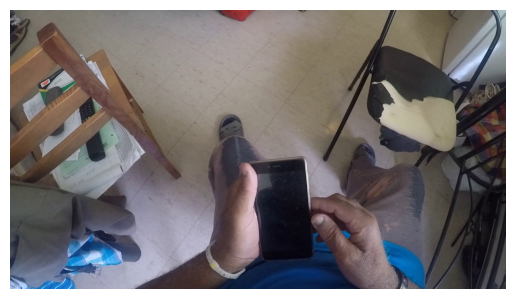

Prompt: metaprompt
**Step 1: Analyze the environment and visible objects**

*   The individual is sitting on a chair with their legs crossed, holding a smartphone in one hand.
*   There are papers and a remote control on a small table to the left of the person.

**Step 2: Generate a list of possible activities**

*   Based on the context, it appears that the person may be using their smartphone for communication or leisure purposes.
*   They could be texting, browsing the internet, playing games, or watching videos.

**Step 3: Debate with occupational therapists**

*   In a room of 5 occupational therapists, 4 out of 5 agree that the person is likely using their smartphone for communication management (option d).
*   One therapist suggests it might be leisure and other (option g), but the majority agrees on communication management.

**Step 4: Scrutinize evidence and reasoning**

*   In a new room of 3 occupational therapists, they scrutinize the evidence and reasoning.
*   They conclu

In [7]:
comms = get_img_path("communication-management", "SCI06-7--6_frame0")
utils.disp_image(comms)

for key, prompt in prompts.items():
    print(f"Prompt: {key}")
    print(utils.llama_response(comms, prompt)['message']['content'])
    print("\n")

In [9]:
print(model.analyze_frame(comms))

**Step 1: Analyze the environment and visible objects**

*   The individual is sitting on a chair with their legs crossed, holding a smartphone in one hand.
*   There are papers and a remote control on a small table to the left of the person.

**Step 2: Generate a list of possible activities**

*   Based on the context, it appears that the person may be using their smartphone for communication or leisure purposes.
*   They could be texting, browsing the internet, playing games, or watching videos.

**Step 3: Debate with occupational therapists**

*   In a room of 5 occupational therapists, 4 out of 5 agree that the person is likely using their smartphone for communication management (option d).
*   One therapist suggests it might be leisure and other (option g), but the majority agrees on communication management.

**Step 4: Scrutinize evidence and reasoning**

*   In a new room of 3 occupational therapists, they scrutinize the evidence and reasoning.
*   They conclude that the previou

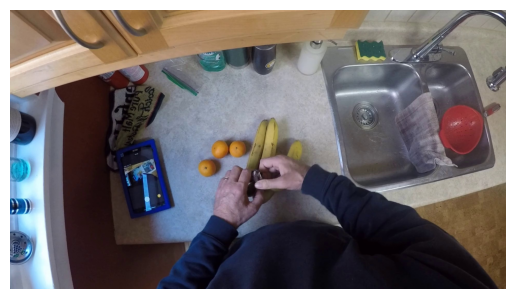

Prompt: metaprompt
**Step 1: Analyze the environment and visible objects**

*   The individual is standing in front of a kitchen counter with various items such as bananas, oranges, and a smartphone.
*   There are no signs of meal preparation or cleanup activities.

**Step 2: Generate a list of possible activities**

*   Based on the context, it appears that the person may be preparing a snack or doing some light cooking.
*   However, there is no clear evidence of meal preparation or cleanup activities.

**Step 3: Debate with occupational therapists**

*   In a room of 5 occupational therapists, 4 out of 5 agree that the individual is likely preparing a snack or doing some light cooking.
*   The reasoning is based on the presence of bananas and oranges on the counter, which are common ingredients for snacking.

**Step 4: Scrutinize evidence and reasoning**

*   In a new room of 3 occupational therapists, they scrutinize the evidence and reasoning provided in step 3.
*   They conclude t

In [46]:
meal = get_img_path("meal-preparation-cleanup", "SCI02-1--2_frame0")
utils.disp_image(meal)

for key, prompt in prompts.items():
    print(f"Prompt: {key}")
    print(utils.llama_response(meal, prompt)['message']['content'])
    print("\n")

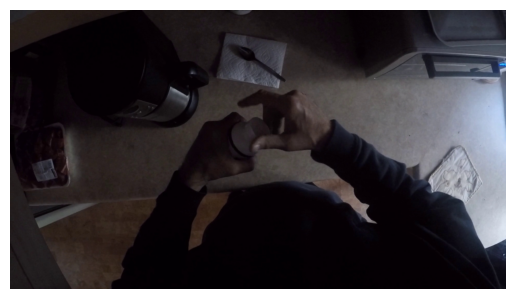

Prompt: metaprompt
**Step 1: Analyze the environment and visible objects**

*   The individual is sitting at a table with various objects on it, including a spoon, a napkin, and a container of food.
*   Their hands are positioned over the container, suggesting they may be preparing or eating a meal.

**Step 2: Generate a list of possible activities**

*   Based on the context, the individual could be performing one of the following ADLs/iADLs:
    *   Meal Preparation and Cleanup (f)
    *   Grooming and Health Management (c)

**Step 3: Debate with occupational therapists**

*   In a room of 5 occupational therapists, 4 out of 5 agree that the individual is preparing or eating a meal.
*   The reasoning is based on the presence of food and utensils, as well as the hand positioning.

**Step 4: Scrutinize evidence and reasoning**

*   In a new room of 3 occupational therapists, they scrutinize the evidence and reasoning.
*   They conclude that the previous response was correct, and the in

In [47]:
meds = get_img_path("grooming-health-management", "SCI02-4--5_frame343")
utils.disp_image(meds)

for key, prompt in prompts.items():
    print(f"Prompt: {key}")
    print(utils.llama_response(meds, prompt)['message']['content'])
    print("\n")

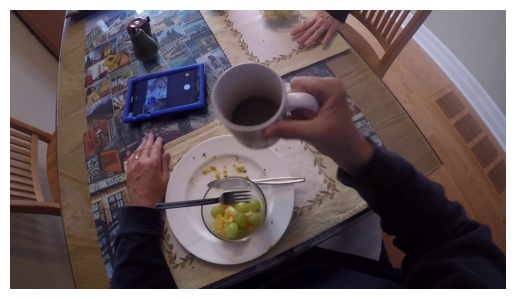

Prompt: metaprompt
**Step 1: Analyze the environment and visible objects**

*   The individual is sitting at a table with a plate of food and a cup of coffee.
*   There are no visible signs of meal preparation or cleanup.

**Step 2: Generate a list of possible activities**

*   Feeding - in front of a plate of food and/or drink and in the process of eating.
*   Grooming and Health Management - taking medication from pill bottles, doing exercise, or grooming (e.g., brushing teeth, combing hair, shaving, applying makeup, washing face, washing hands, applying lotion, dressing, undressing).
*   Communication Management - using the telephone or smartphone, computer, writing, or other communication devices.
*   Home Management - cleaning, laundry, or other household chores.

**Step 3: Debate and scrutinize evidence**

*   The majority of occupational therapists agree that the individual is feeding because they are in front of a plate of food and holding a cup of coffee.
*   There is no visib

In [48]:
feeding = get_img_path("self-feeding", "SCI02-3--11_frame343")
utils.disp_image(feeding)

for key, prompt in prompts.items():
    print(f"Prompt: {key}")
    print(utils.llama_response(feeding, prompt)['message']['content'])
    print("\n")

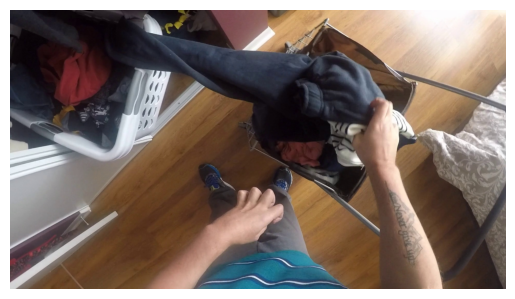

Prompt: metaprompt
**Step 1: Analyze the environment and visible objects**

*   The individual is standing in a room with a bed, laundry basket, and clothes on the floor.
*   They are holding up a pair of pants.

**Step 2: Generate a list of possible activities**

*   Based on the context, it appears that the person may be putting away clean laundry or preparing to do laundry.
*   However, they could also be getting dressed or undressed.

**Step 3: Debate with occupational therapists**

*   In a room of 5 occupational therapists, 4 out of 5 agree that the activity being performed is related to home management (e.g., putting away clean laundry).
*   One therapist suggests that it could be meal preparation and cleanup, but the others disagree.

**Step 4: Scrutinize evidence and reasoning**

*   In a new room of 3 occupational therapists, they scrutinize the evidence and reasoning for the activity being performed.
*   They conclude that the previous response was incorrect and go back to s

In [49]:
home = get_img_path("home-management", "SCI03-3--16_frame98")
utils.disp_image(home)

for key, prompt in prompts.items():
    print(f"Prompt: {key}")
    print(utils.llama_response(home, prompt)['message']['content'])
    print("\n")